In [2]:
#Import library

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import seaborn as sns

# I. Train

## 1. Perform a K-means with K = 10 on the learning base(BA): optdigits.tra 

In [3]:
dataset_train = pd.read_csv('optdigits.tra', header = None)
dataset_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
print(dataset_train.shape)

(3823, 65)


In [5]:
X_train = dataset_train.iloc[:, :-1].values
Y_train = dataset_train.iloc[:, -1].values
#innitialize the class object
kmeans = KMeans(n_clusters=10, random_state=43, n_init='auto')
#predict the labels of clusters
label = kmeans.fit_predict(X_train)

print(label)

[5 5 7 ... 8 8 7]


In [6]:
X_train

array([[ 0,  1,  6, ...,  1,  0,  0],
       [ 0,  0, 10, ...,  3,  0,  0],
       [ 0,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  3, ...,  9,  0,  0],
       [ 0,  0,  6, ..., 16,  5,  0],
       [ 0,  0,  2, ...,  0,  0,  0]], dtype=int64)

In [7]:
Y_train

array([0, 0, 7, ..., 6, 6, 7], dtype=int64)

## 2. By cluster: make a histogram of the number of digits in each class

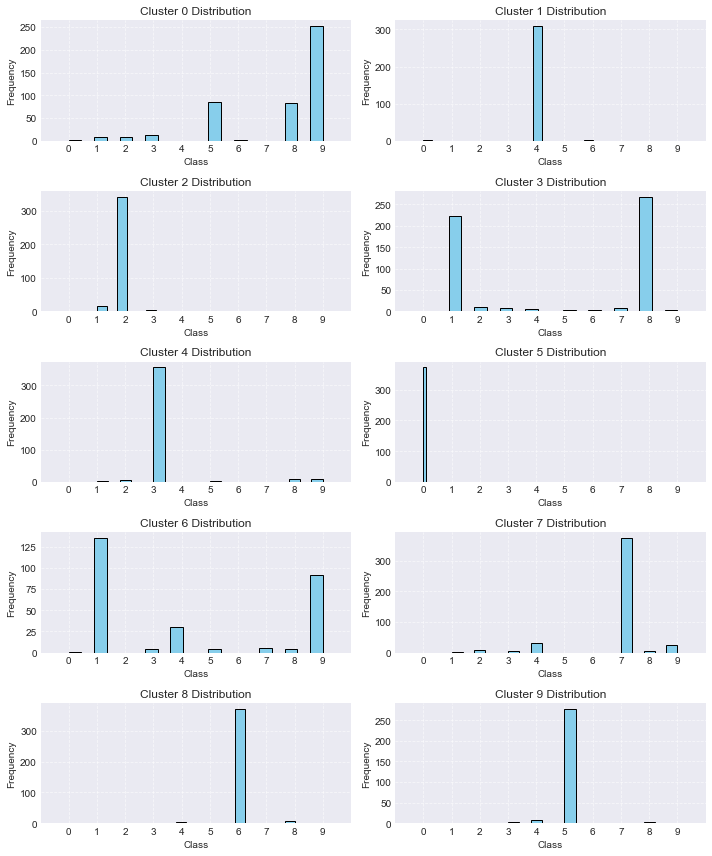

In [8]:
# Set a style for the plots. You can choose other styles like 'ggplot', 'seaborn-darkgrid', etc.
plt.style.use('seaborn-darkgrid')

# Create a figure with specified size
plt.figure(figsize=(10, 12))

for i in range(10):
    plt.subplot(5, 2, i + 1)
    # Set x-axis limits
    plt.xlim(-1, 10)
    # Set the ticks on the x-axis
    plt.xticks(range(0, 10))
    # Create a histogram for the cluster
    plt.hist(Y_train[label == i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Cluster {i} Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    # Adding grid to each subplot for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

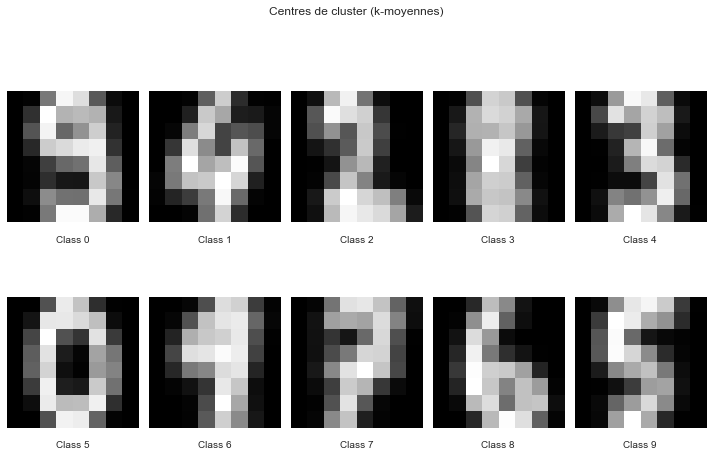

In [9]:
plt.figure(figsize=(10, 7))
plt.suptitle('Centres de cluster (k-moyennes)')
kmeans_centers = kmeans.cluster_centers_
for i in range(len(kmeans_centers)):
    plt.subplot(2, 5, i + 1)
    # Display the image for each cluster center
    plt.imshow(np.reshape(kmeans_centers[i], (8, 8)), interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')
    # Add a title to each subplot with the cluster number
    plt.title(f'Class {i}', fontsize=10, y=-0.2)  # Adjust font size and position as needed

plt.tight_layout()
plt.show()

### Analyse

First, we are working on training dataset, by using K-mean model, we cluster the data into 10 cluster, like you can see, we have 10 histogram of each cluster which show the frequency of each class in each cluster, for the first cluster(pic1) the class that has the most frequecy, which mean it’s the best represent of this cluster in class1. However, we also notice that it’s mix with a few data from class 8.. If we take a look at the image, we can see that some cluster represent well by the a class, for example the last histogram witch represent by class 0, whereas the third histogram(seconde left), even though it best represent by class 9, it still confuse by class 5 which is also appear in this cluster. 

In [10]:
from scipy.stats import mode
clusters = kmeans.fit_predict(X_train)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(Y_train[mask])[0]

C:\Users\Cs-Store\AppData\Local\Temp\ipykernel_10724\4084804631.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(Y_train[mask])[0]


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, labels)

0.7998953701281716

### Conclusion
With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits

## 3. Measuring clustering quality with the Silhouette index

In [12]:
print(f'Silhouette index: {silhouette_score(X_train, kmeans.fit_predict(X_train))}') #cluster_train should be clusters(predicted label) 

Silhouette index: 0.18379938562570994


The value of the Silhouette Coefficient is nearly 0 which indicate overlapping clusters. Therefore, it's not a good clustering. 

## 4. Vary K between 10 and 20 clusters and calculate the Silhouette index for each K.

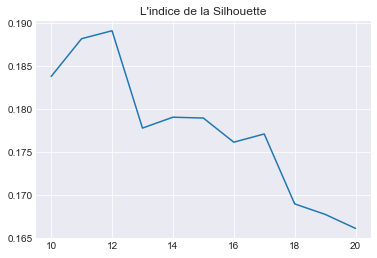

Maximum value of Silhouette index: 0.18912411715384445
On obtiens un meilleur Clustering avec K = 12


In [13]:
K_list = list(range(10,21))
silhouette = []
for k in K_list:
    kmeans = KMeans(n_clusters=k ,random_state=43 ,n_init='auto')
    kmeans.fit(X_train)
    silhouette.append(silhouette_score(X_train, kmeans.labels_))
plt.plot([k for k in K_list],silhouette )
plt.title("L'indice de la Silhouette")
plt.show()

best_k = K_list[silhouette.index(max(silhouette))]
print(f'Maximum value of Silhouette index: {max(silhouette)}')
print(f'On obtiens un meilleur Clustering avec K = {best_k}')

# K=12

In [14]:
X_train = dataset_train.iloc[:, :-1].values
Y_train = dataset_train.iloc[:, -1].values
#innitialize the class object
kmeans12 = KMeans(n_clusters=12, random_state=43, n_init='auto')
#predict the labels of clusters
label = kmeans12.fit_predict(X_train)

In [15]:
cluster_to_label = {}

# for each cluster
for i in range(10):

    # labels in the cluster
    label_in_cluster_i = Y_train[[c == i for c in label]]

    # count number of each label in the cluster
    num_label_in_cluster_i = [
        np.sum([int(l == j) for l in label_in_cluster_i])
        for j in range(10)
    ]

    # assign label that exist the most in the cluster to the cluster
    cluster_to_label[i] = num_label_in_cluster_i.index(
                                max(num_label_in_cluster_i))

print('Majority vote (cluster to label):\n', cluster_to_label)

Majority vote (cluster to label):
 {0: 9, 1: 4, 2: 2, 3: 1, 4: 3, 5: 0, 6: 1, 7: 7, 8: 6, 9: 5}


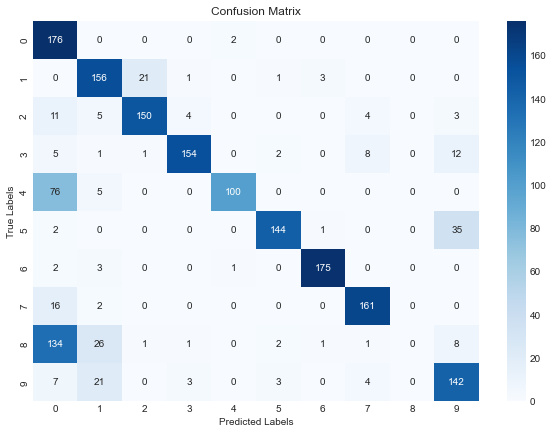

              precision    recall  f1-score   support

           0      0.410     0.989     0.580       178
           1      0.712     0.857     0.778       182
           2      0.867     0.847     0.857       177
           3      0.945     0.842     0.890       183
           4      0.971     0.552     0.704       181
           5      0.947     0.791     0.862       182
           6      0.972     0.967     0.970       181
           7      0.904     0.899     0.902       179
           8      0.000     0.000     0.000       174
           9      0.710     0.789     0.747       180

    accuracy                          0.756      1797
   macro avg      0.744     0.753     0.729      1797
weighted avg      0.747     0.756     0.732      1797



C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [16]:
test_data = pd.read_csv('optdigits.tes', header=None)
X_test = test_data.iloc[:, 0:64]
y_test = test_data.iloc[:, 64]

cluster_test = kmeans12.predict(X_test)
default_label = 0
y_test_predict = [cluster_to_label.get(c, default_label) for c in cluster_test]

cm = confusion_matrix(y_test, y_test_predict)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Confusion matrix
#print(f'Confusion matrix:\n{cm}')

# Performance
print(classification_report(y_test, y_test_predict, digits=3))

# II. Test

## Classification à partir du Clustering obtenu sur optdigits.tra

### 1. By cluster: hold a majority vote to award a label to each cluster

In [17]:
cluster_to_label = {}

# for each cluster
for i in range(10):

    # labels in the cluster
    label_in_cluster_i = Y_train[[c == i for c in label]]

    # count number of each label in the cluster
    num_label_in_cluster_i = [
        np.sum([int(l == j) for l in label_in_cluster_i])
        for j in range(10)
    ]

    # assign label that exist the most in the cluster to the cluster
    cluster_to_label[i] = num_label_in_cluster_i.index(
                                max(num_label_in_cluster_i))

print('Majority vote (cluster to label):\n', cluster_to_label)

Majority vote (cluster to label):
 {0: 9, 1: 4, 2: 2, 3: 1, 4: 3, 5: 0, 6: 1, 7: 7, 8: 6, 9: 5}


### 2. For each BT element: optdigits.tes
- Find the nearest Cluster (Center)
- Assign to this BT element the label associated with the nearest Cluster
- Calculate the confusion matrix (10*10 matrix) and overall performance: analyze confusions

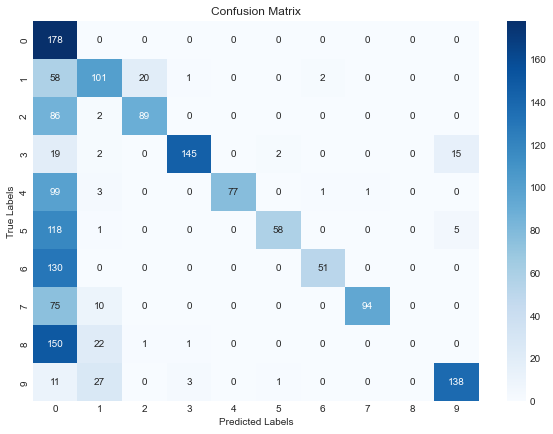

              precision    recall  f1-score   support

           0      0.193     1.000     0.323       178
           1      0.601     0.555     0.577       182
           2      0.809     0.503     0.620       177
           3      0.967     0.792     0.871       183
           4      1.000     0.425     0.597       181
           5      0.951     0.319     0.477       182
           6      0.944     0.282     0.434       181
           7      0.989     0.525     0.686       179
           8      0.000     0.000     0.000       174
           9      0.873     0.767     0.817       180

    accuracy                          0.518      1797
   macro avg      0.733     0.517     0.540      1797
weighted avg      0.736     0.518     0.543      1797



C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [18]:
import seaborn as sns
test_data = pd.read_csv('optdigits.tes', header=None)
X_test = test_data.iloc[:, 0:64]
y_test = test_data.iloc[:, 64]

cluster_test = kmeans.predict(X_test)
default_label = 0
y_test_predict = [cluster_to_label.get(c, default_label) for c in cluster_test]

cm = confusion_matrix(y_test, y_test_predict)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Confusion matrix
#print(f'Confusion matrix:\n{cm}')

# Performance
print(classification_report(y_test, y_test_predict, digits=3))

# III. Comparison with Hierarchical Clustering (using Ward's criterion)

### Hierarchical clustering and dendrogram visualization

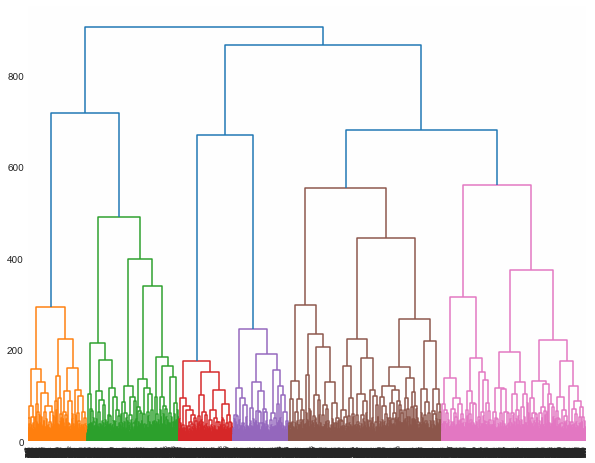

In [19]:
plt.figure(figsize=(10,8))
linkage_matrix = linkage(X_train, method='ward', metric='euclidean')
d = dendrogram(linkage_matrix)
plt.show()

### Cut the dendrogram at K=10

[0 0 1 ... 3 3 1]


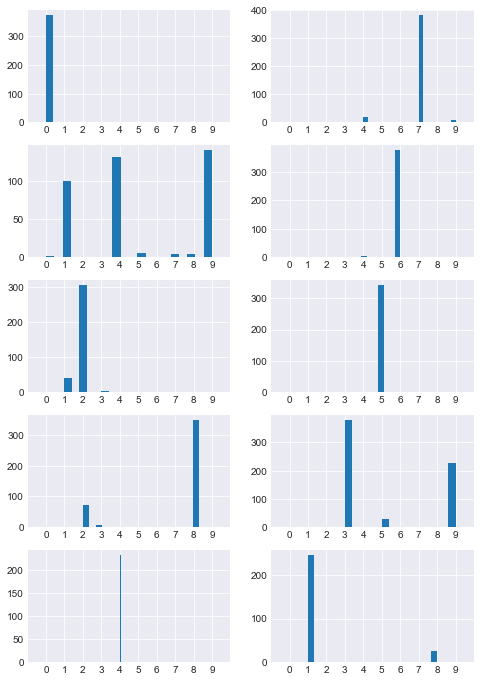

In [20]:
# Cut the dendrogram with K = 10 clusters
hierarchy_labels = cut_tree(linkage_matrix, n_clusters=10).ravel()
print(hierarchy_labels)


# Faire des histogrammes
plt.figure(figsize=(8,12))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.xlim(-1,10)
    plt.xticks(range(0,10))
    plt.hist(Y_train[[c == i for c in hierarchy_labels]], bins=20)
plt.show()

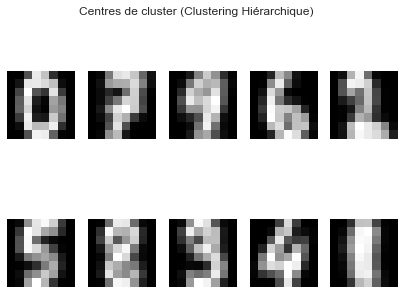

In [21]:
# Trouver les centres de chaque cluster
centers = []
for i in range(10):
    sum = np.zeros(64)
    count = 0
    for j in range(len(hierarchy_labels)):
        if hierarchy_labels[j] == i:
            sum += X_train[j,:]
            count += 1
    centers.append(sum/count)

# Plot center of each cluster
plt.figure(figsize=(7,5))
plt.suptitle('Centres de cluster (Clustering Hiérarchique)')
for i in range(len(centers)):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.reshape(np.array(centers[i]), (8,8)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

## Calculate the a Silhouette index

In [22]:
# Mesurer la qualité du Clustering avec l’indice de la Silhouette
print("Silhouette index:", silhouette_score(X_train, hierarchy_labels))

Silhouette index: 0.1745470931891432


## Cut the dendrogram into 11 and 20 clusters and calculate the Silhouette index for each K. 

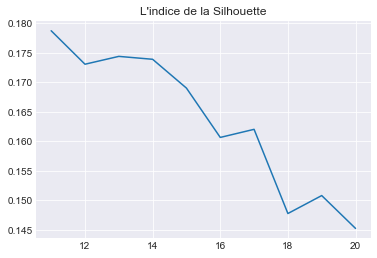

Maximum value of Silhouette index: 0.17871212582446985
On obtiens un meilleur Clustering avec K = 11


In [23]:
K_list = list(range(11,21))
silhouette = []
for k in K_list:
    hierarchy_labels = cut_tree(linkage_matrix, n_clusters=k).ravel()
    silhouette.append(silhouette_score(X_train, hierarchy_labels))
    
plt.plot([k for k in K_list],silhouette )
plt.title("L'indice de la Silhouette")
plt.show()

best_k = K_list[silhouette.index(max(silhouette))]
print(f'Maximum value of Silhouette index: {max(silhouette)}')
print(f'On obtiens un meilleur Clustering avec K = {best_k}')

### Conclusion
Compare to K-means. So the K-means silhouette index is greater than Hierarchical

# IV. TEST

### Majority voting

In [24]:
cluster_to_label = {}

# for each cluster
for i in range(10):

    # labels in the cluster
    label_in_cluster_i = Y_train[[c == i for c in hierarchy_labels]]

    # count number of each label in the cluster
    num_label_in_cluster_i = [
        np.sum([int(l == j) for l in label_in_cluster_i])
        for j in range(10)
    ]

    # assign label that exist the most in the cluster to the cluster
    cluster_to_label[i] = num_label_in_cluster_i.index(
                                max(num_label_in_cluster_i))

print('Majority vote (cluster to label):\n', cluster_to_label)

Majority vote (cluster to label):
 {0: 0, 1: 7, 2: 9, 3: 6, 4: 2, 5: 5, 6: 8, 7: 7, 8: 1, 9: 3}


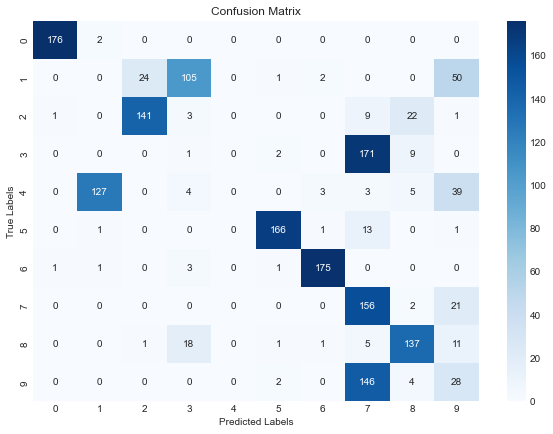

              precision    recall  f1-score   support

           0      0.989     0.989     0.989       178
           1      0.000     0.000     0.000       182
           2      0.849     0.797     0.822       177
           3      0.007     0.005     0.006       183
           4      0.000     0.000     0.000       181
           5      0.960     0.912     0.935       182
           6      0.962     0.967     0.964       181
           7      0.310     0.872     0.457       179
           8      0.765     0.787     0.776       174
           9      0.185     0.156     0.169       180

    accuracy                          0.545      1797
   macro avg      0.503     0.548     0.512      1797
weighted avg      0.500     0.545     0.509      1797



C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [25]:
import math
# Find the distances between each element and the centers
y_pred = []
for i in range(len(X_test)):
    dist = [
        math.dist(X_test.loc[i,:], centers[j]) 
        for j in range(10)
    ]
    # Attribuer à cet élément de la BT le label associé au Cluster le plus proche
    y_pred.append(dist.index(min(dist)))

# Convert cluster to label
y_pred = [cluster_to_label[c] for c in y_pred]

cm = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Confusion matrix
# print('Confusion matrix:\n{}'.format(
#                     confusion_matrix(y_test, y_pred)))

# Calcul la performance globale
print(classification_report(y_test, y_pred, digits=3))

# k=11

In [26]:
hierarchy_labels11 = cut_tree(linkage_matrix, n_clusters=11).ravel()

In [27]:
cluster_to_label = {}

# for each cluster
for i in range(10):

    # labels in the cluster
    label_in_cluster_i = Y_train[[c == i for c in hierarchy_labels11]]

    # count number of each label in the cluster
    num_label_in_cluster_i = [
        np.sum([int(l == j) for l in label_in_cluster_i])
        for j in range(10)
    ]

    # assign label that exist the most in the cluster to the cluster
    cluster_to_label[i] = num_label_in_cluster_i.index(
                                max(num_label_in_cluster_i))

print('Majority vote (cluster to label):\n', cluster_to_label)

Majority vote (cluster to label):
 {0: 0, 1: 7, 2: 9, 3: 6, 4: 2, 5: 5, 6: 8, 7: 1, 8: 3, 9: 4}


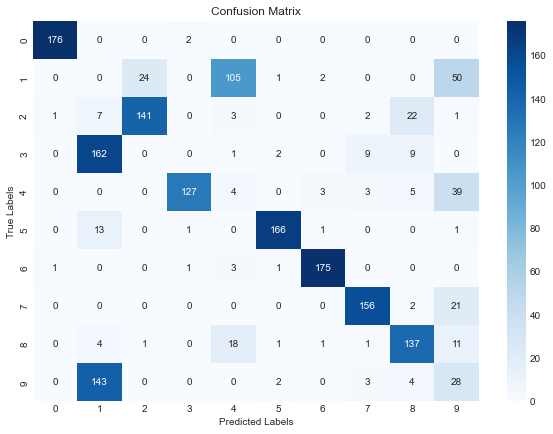

              precision    recall  f1-score   support

           0      0.989     0.989     0.989       178
           1      0.000     0.000     0.000       182
           2      0.849     0.797     0.822       177
           3      0.000     0.000     0.000       183
           4      0.030     0.022     0.025       181
           5      0.960     0.912     0.935       182
           6      0.962     0.967     0.964       181
           7      0.897     0.872     0.884       179
           8      0.765     0.787     0.776       174
           9      0.185     0.156     0.169       180

    accuracy                          0.547      1797
   macro avg      0.564     0.550     0.556      1797
weighted avg      0.561     0.547     0.553      1797



In [28]:
import math
# Find the distances between each element and the centers
y_pred = []
for i in range(len(X_test)):
    dist = [
        math.dist(X_test.loc[i,:], centers[j]) 
        for j in range(10)
    ]
    # Attribuer à cet élément de la BT le label associé au Cluster le plus proche
    y_pred.append(dist.index(min(dist)))

# Convert cluster to label
y_pred = [cluster_to_label[c] for c in y_pred]

cm = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcul la performance globale
print(classification_report(y_test, y_pred, digits=3))